In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import stft
from scipy.io.wavfile import read as wave_read
from scipy.fft import fft, ifft, fftshift, fft2, ifft2

%matplotlib inline 

In [3]:
def step(x):
    if x >= -.5 and x <=.5:
        return 1.
    else:
        return 0.

In [8]:
def step_fun_filter(a, b, t, w0, w):
    if t+b/2. < -a/2. or t-b/2. > a/2.:
        return 0.
    else:
        ffun = lambda tau : ( np.exp(1j*(w0-w)*tau)/(w0-w) - np.exp(-1j*(w0+w)*tau)/(w0+w) )/(2.*a*1j)
        return ffun( np.min( np.array([a/2, t + b/2.]) ) ) - ffun( np.max( np.array([-a/2, t - b/2.]) ) )


**Problem 1** (Grad/Extra Credit): Provide a more formal proof of the result we showed in class:

> Theorem: Suppose $f(t)$ is a $T$ periodic function and $f\in C^{k}([0,T])$, where $k\in \mathbb{N}$.  Show that there exists a constant $M_{k}>0$ such that 
$$
\left|\hat{f}_{n}\right|\leq M_{k}\sqrt{T}\left(\frac{T}{2\pi|n|}\right)^{k}.  
$$

**Problem 2**: Find the Fourier transform of 
$$
f(t) = \left\{\begin{array}{rl} 
t & 0 \leq t \leq \pi \\ 
2\pi - t & \pi \leq t < 2 \pi
\end{array}\right.
$$

Comment on the behavior of its Fourier coefficients $\hat{f}_{n}$ as $|n|\rightarrow \infty$.  How can you explain this behavior in light of the results from Problem 1?  

**Problem 3**: For $f(t+T)=f(t)$ so that 

$$
f(t) = \sum_{n=-\infty}^{\infty} \hat{f}_{n} e^{2\pi i n t/T}, ~ \hat{f}_{n} = \frac{1}{T} \int_{-T/2}^{T/2}f(t)e^{-2\pi i nt/T} dt,
$$

defining $\omega_{n} = 2\pi n/T$ so that $\delta \omega = 2\pi /T$, show that by letting $T\rightarrow \infty$, we have 

$$
f(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} e^{i\omega t} \left(\int_{-\infty}^{\infty}f(t)e^{-i\omega t}dt\right) d\omega
$$

**Problem 4**: Suppose you are given the signal 

$$
d(t) = \cos(\omega_{0}t)I_{a}(t)
$$

using $g_{W}(s) = I(s/b), ~b > 0$, its short time Fourier transform is:

$$
\mathcal{G}(t,\omega)\{d(t)\} = \frac{1}{a}\int_{-a/2}^{a/2}\cos(\omega_{0}\tau)I\left(\frac{\tau - t}{b}\right)e^{-i\omega \tau}.
$$

* For $\omega_{0}=10$, $a=.5$ and $b=.5$, plot $\left|\mathcal{G}(t,\omega)\{d\}\right|$ in the $(t,\omega)$ plane.
* For $\omega_{0}=10$, $a=.5$ and $b=2$, plot $\left|\mathcal{G}(t,\omega)\{d\}\right|$ in the $(t,\omega)$ plane.
* Explain the differences between the two plots.  

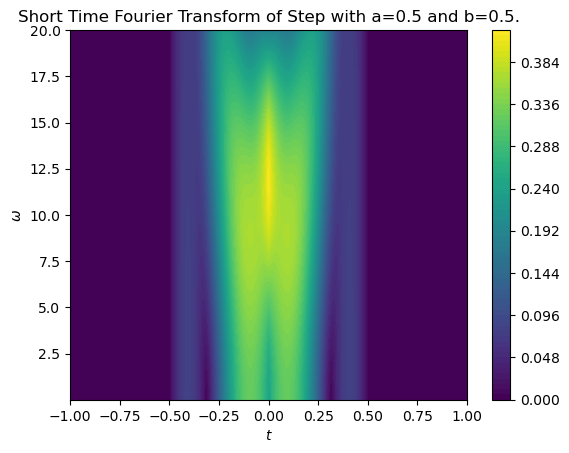

In [12]:
a = .5
b = .5
w0 = 10.
Npts = int(2e2)
tvals = np.linspace(-1, 1, Npts+1)
ovals = np.linspace(1e-3, 20., Npts+1)

box_stft = np.zeros((Npts+1, Npts+1), dtype=np.float64)
for jj in range(Npts+1):
    for kk in range(Npts+1):
        box_stft[kk, jj] = np.abs(step_fun_filter(a, b, tvals[jj], w0, ovals[kk]))

plt.contourf(tvals, ovals, box_stft, levels=80)
plt.xlabel(r"$t$")
plt.ylabel(r"$\omega$")
plt.title(f"Short Time Fourier Transform of Step with a={a} and b={b}.")
plt.colorbar()

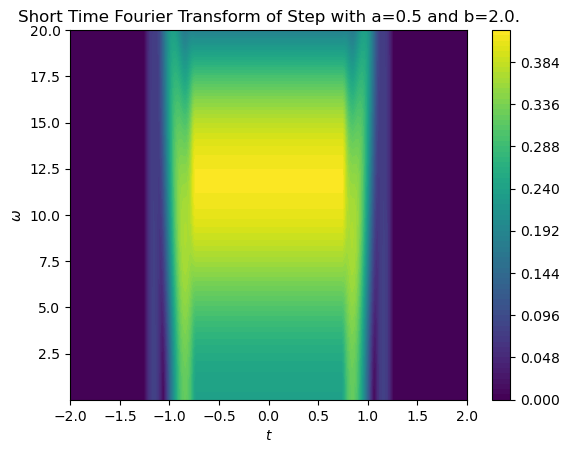

In [13]:
a = .5
b = 2.
w0 = 10.
Npts = int(2e2)
tvals = np.linspace(-2, 2, Npts+1)
ovals = np.linspace(1e-3, 20., Npts+1)

box_stft = np.zeros((Npts+1, Npts+1), dtype=np.float64)
for jj in range(Npts+1):
    for kk in range(Npts+1):
        box_stft[kk, jj] = np.abs(step_fun_filter(a, b, tvals[jj], w0, ovals[kk]))

plt.contourf(tvals, ovals, box_stft, levels=80)
plt.xlabel(r"$t$")
plt.ylabel(r"$\omega$")
plt.title(f"Short Time Fourier Transform of Step with a={a} and b={b}.")
plt.colorbar()

So as we see, and expect, by narrowing the filter width, we see a bright spot around $\omega_{0}=10$, though smeared due to poor frequency resolution.  By increasing $b$, we of course lose time resolution, but we now see a much clearer bright band across the line $\omega_{0}=10$.  

**Problem 5** (Graduate/Extra Credit): Suppose you are given the signal 

$$
d(t) = \cos(\omega_{0}t)I_{a}(t) + \cos(2\omega_{0}t)I_{a}(t-2)
$$

* Plot $d(t)$ and comment on its behavior.  
* Using $g_{W}(s) = I(s/b), b > 0$ repeat your analysis above for $\omega_{0}=10$, $a=.5$ and $b=.5$.  Explain your results. 

Text(0.5, 1.0, '$d(t)$ with $\\omega_{0}=10$')

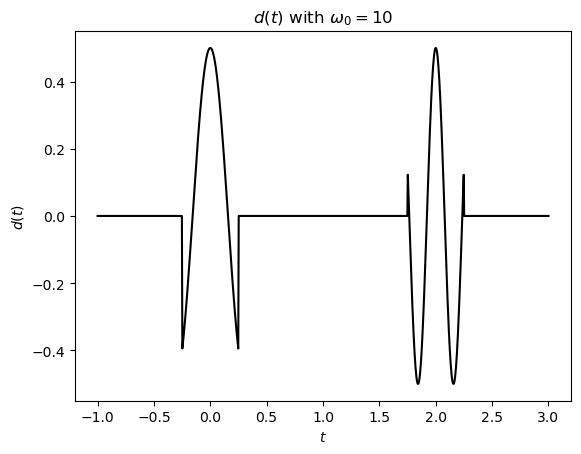

In [14]:
tvals = np.linspace(-1., 3., int(1e3)+1)
a = .5
w0 = 10.
dvals = np.cos(w0*tvals) * np.array([a*step(tval/a) for tval in tvals]) + np.cos(2.*w0*(tvals-2)) * np.array([a*step((tval-2.)/a) for tval in tvals])

plt.plot(tvals, dvals, color='k')
plt.ylabel(r"$d(t)$")
plt.xlabel(r"$t$")
plt.title(r"$d(t)$ with $\omega_{0}=10$")

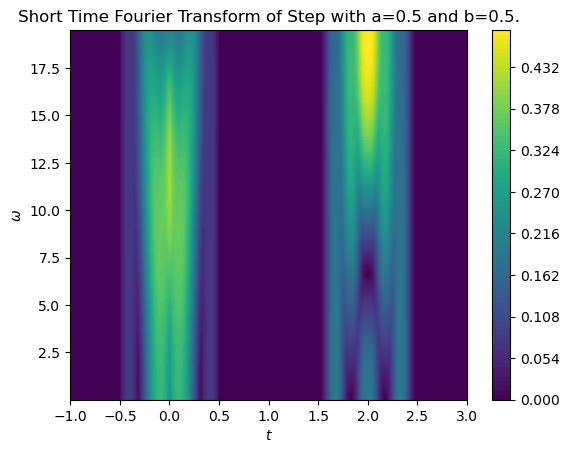

In [16]:
a = .5
b = .5
w0 = 10.
Npts = int(2e2)
tvals = np.linspace(-1, 3, Npts+1)
ovals = np.linspace(1e-3, 19.5, Npts+1)

box_stft = np.zeros((Npts+1, Npts+1), dtype=np.float64)
for jj in range(Npts+1):
    for kk in range(Npts+1):
        box_stft[kk, jj] = np.abs(step_fun_filter(a, b, tvals[jj], w0, ovals[kk]) + step_fun_filter(a, b, tvals[jj]-2., 2.*w0, ovals[kk]))

plt.contourf(tvals, ovals, box_stft, levels=80)
plt.xlabel(r"$t$")
plt.ylabel(r"$\omega$")
plt.title(f"Short Time Fourier Transform of Step with a={a} and b={b}.")
plt.colorbar()

So as we expect, we get two time separated signals each with some degree of frequency localization around their carrier frequencies.  The low value of $b$ though causes significant smearing in frequency space, though we already knew that would be an issue from above.  Just to see what happens if we play with this a little, let's repeat the above but with $b=1.$

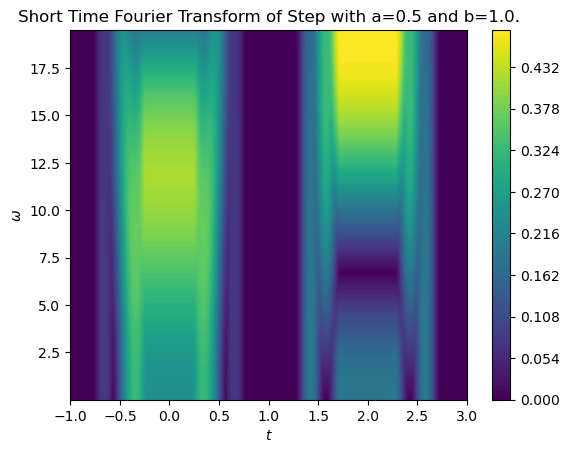

In [17]:
a = .5
b = 1.
w0 = 10.
Npts = int(2e2)
tvals = np.linspace(-1, 3, Npts+1)
ovals = np.linspace(1e-3, 19.5, Npts+1)

box_stft = np.zeros((Npts+1, Npts+1), dtype=np.float64)
for jj in range(Npts+1):
    for kk in range(Npts+1):
        box_stft[kk, jj] = np.abs(step_fun_filter(a, b, tvals[jj], w0, ovals[kk]) + step_fun_filter(a, b, tvals[jj]-2., 2.*w0, ovals[kk]))

plt.contourf(tvals, ovals, box_stft, levels=80)
plt.xlabel(r"$t$")
plt.ylabel(r"$\omega$")
plt.title(f"Short Time Fourier Transform of Step with a={a} and b={b}.")
plt.colorbar()

**Problem 6**: Generate a short-time Fourier transform decomposition of Cantina60.wav.  Explain your parameter choices, and show possible alternative representations of your STFT and why you finally chose the one that you did.  You should also make recourse to the song itself and use that to help you explain your decision making process.

In [18]:
rate, star_wars_data = wave_read('CantinaBand60.wav') # This is the first minute of the 
print(type(star_wars_data))

nsamp = star_wars_data.size
star_wars_fs = nsamp/60. # number of samples taken over 60s is sampling frequency
tvals = np.linspace(0., 60., nsamp)
freqvals = np.arange(int(nsamp/2))/60.
print(f"File is sampled at {star_wars_fs} cycles/second")
freq_star = np.abs(fft(star_wars_data))

<class 'numpy.ndarray'>
File is sampled at 22050.0 cycles/second


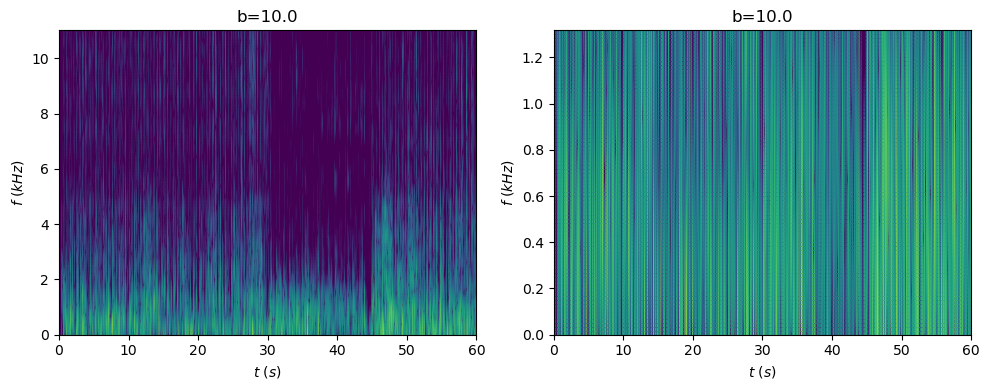

In [29]:
bval2 = 10.
seglength = int(nsamp/1000)
f2, t2, Zxx2 = stft(star_wars_data, fs=star_wars_fs, window = ('gaussian', bval2), noverlap=int(seglength/10), nperseg=seglength)
scalefac = np.max(np.abs(Zxx2))
# Find the low, more audible frequencies
indskp = f2 <= 3. * 440.

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].pcolormesh(t2, f2/1000, np.ma.log10(np.abs(Zxx2)/scalefac), vmin=-2.5, vmax = 0, shading='gouraud')
ax[0].set_xlabel(r"$t ~(s)$")
ax[0].set_ylabel(r"$f ~ (kHz)$")
ax[0].set_title(f"b={bval2}")

ax[1].pcolormesh(t2, f2[indskp]/1000, np.ma.log10(np.abs(Zxx2[indskp, :])/scalefac), vmin=-2.5, vmax = 0, shading='gouraud')
ax[1].set_xlabel(r"$t ~(s)$")
ax[1].set_ylabel(r"$f ~ (kHz)$")
ax[1].set_title(f"b={bval2}")

plt.tight_layout()

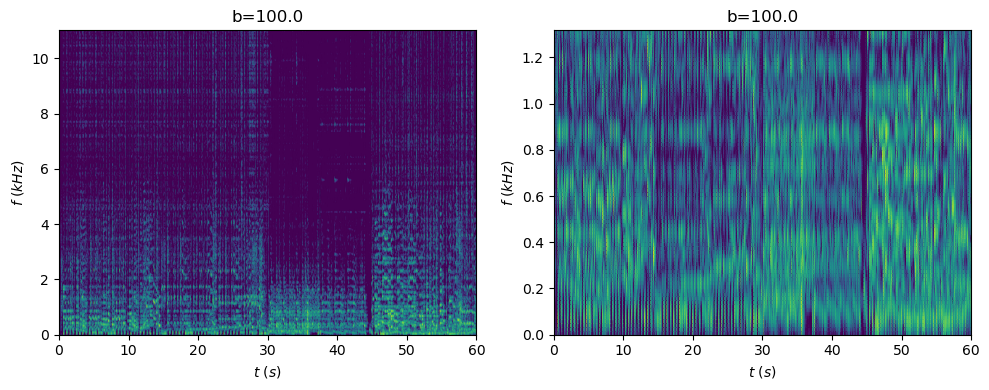

In [30]:
bval2 = 100.
seglength = int(nsamp/1000)
f2, t2, Zxx2 = stft(star_wars_data, fs=star_wars_fs, window = ('gaussian', bval2), noverlap=int(seglength/10), nperseg=seglength)
scalefac = np.max(np.abs(Zxx2))
# Find the low, more audible frequencies
indskp = f2 <= 3. * 440.

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].pcolormesh(t2, f2/1000, np.ma.log10(np.abs(Zxx2)/scalefac), vmin=-2.5, vmax = 0, shading='gouraud')
ax[0].set_xlabel(r"$t ~(s)$")
ax[0].set_ylabel(r"$f ~ (kHz)$")
ax[0].set_title(f"b={bval2}")

ax[1].pcolormesh(t2, f2[indskp]/1000, np.ma.log10(np.abs(Zxx2[indskp, :])/scalefac), vmin=-2.5, vmax = 0, shading='gouraud')
ax[1].set_xlabel(r"$t ~(s)$")
ax[1].set_ylabel(r"$f ~ (kHz)$")
ax[1].set_title(f"b={bval2}")

plt.tight_layout()

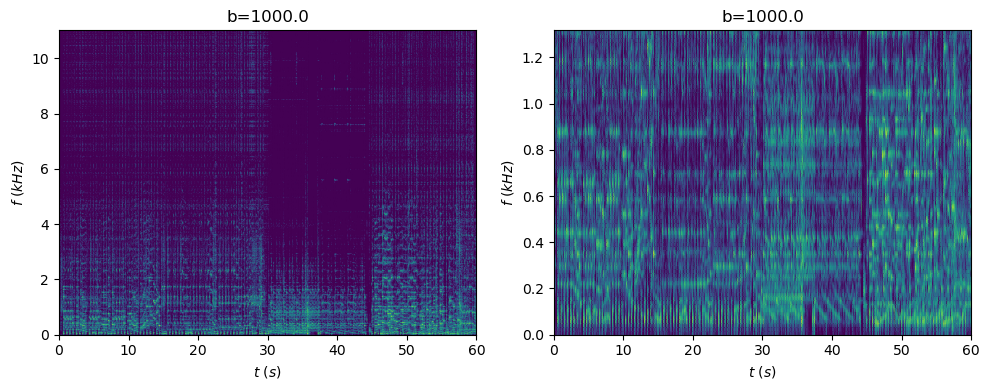

In [28]:
bval2 = 1000.
seglength = int(nsamp/1000)
f2, t2, Zxx2 = stft(star_wars_data, fs=star_wars_fs, window = ('gaussian', bval2), noverlap=int(seglength/10), nperseg=seglength)
scalefac = np.max(np.abs(Zxx2))
# Find the low, more audible frequencies
indskp = f2 <= 3. * 440.

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].pcolormesh(t2, f2/1000, np.ma.log10(np.abs(Zxx2)/scalefac), vmin=-2.5, vmax = 0, shading='gouraud')
ax[0].set_xlabel(r"$t ~(s)$")
ax[0].set_ylabel(r"$f ~ (kHz)$")
ax[0].set_title(f"b={bval2}")

ax[1].pcolormesh(t2, f2[indskp]/1000, np.ma.log10(np.abs(Zxx2[indskp, :])/scalefac), vmin=-2.5, vmax = 0, shading='gouraud')
ax[1].set_xlabel(r"$t ~(s)$")
ax[1].set_ylabel(r"$f ~ (kHz)$")
ax[1].set_title(f"b={bval2}")

plt.tight_layout()

So we see that as we crank up $b$ to admittedly what seems like abusrd values, we are able to, once we zoom in on the most essential frequencies in our song, start to get something that looks like well resolved freqencies, though we are certainly costing ourselves temporal resolution as can be seen by the relatively long, flat profiles when $b=1000$.  That said, you can, if you follow with your eyes, start to ``see" the song.  